In [1]:
from time_series_generator import TimeSeriesGenerator
from time_series_ddpm_model import TimeSeriesDDPM
import numpy as np
from statsmodels.tsa import ar_model
import matplotlib.pyplot as plt
import torch

In [12]:
data=TimeSeriesGenerator.generate_ar_series(500, 100, 1, 0.6,0.1)

In [13]:
series=data.numpy()

In [14]:
series.shape

(500, 100, 1)

In [15]:
tsmodel=ar_model.AutoReg(series[0], 1, trend='n')

In [16]:
result=tsmodel.fit()

In [17]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                  94.076
Method:               Conditional MLE   S.D. of innovations              0.094
Date:                Wed, 26 Mar 2025   AIC                           -184.153
Time:                        17:22:24   BIC                           -178.963
Sample:                             1   HQIC                          -182.053
                                  100                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y.L1           0.6509      0.046     14.019      0.000       0.560       0.742
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5362           +0.0000j            1.5362            0.0000
-----------------------------------------------------------------------------
"""

In [18]:
result.params[0]

np.float64(0.6509395516303744)

In [19]:
def phi_parameter_estimation(series):
    """This function takes an array of AR1 time series as an argument
    and returns  a list of the phi1 estimated parameter for each series"""
    params_list=[]
    for serie in series:
        tsmodel=ar_model.AutoReg(serie, 1, trend='n')
        result=tsmodel.fit()
        params_list.append(result.params[0])
    return params_list

In [20]:
params=phi_parameter_estimation(series)

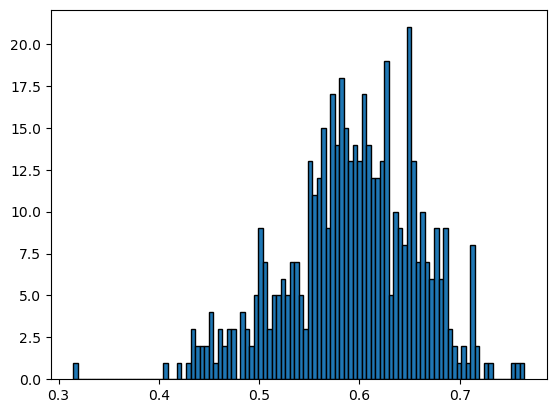

In [21]:
plt.hist(params, bins=100, edgecolor='black')
plt.show()

In [24]:
model=TimeSeriesDDPM(input_dim=1, use_conv=True, conv_channels=16, num_lstm_layers=2, hidden_dim=32, T=1000)

In [26]:
model.train_model(data, num_epochs=40, plot=False)

Epoch 1, Loss: 0.07725935822352767
Epoch 2, Loss: 0.04503431336954236
Epoch 3, Loss: 0.04812916547060013
Epoch 4, Loss: 0.053698075944557784
Epoch 5, Loss: 0.054054265315644445
Epoch 6, Loss: 0.053381046634167435
Epoch 7, Loss: 0.059253004589118065
Epoch 8, Loss: 0.049528434281237425
Epoch 9, Loss: 0.051750376140698794
Epoch 10, Loss: 0.04239289447199553
Epoch 11, Loss: 0.05145889616571367
Epoch 12, Loss: 0.05734841149300337
Epoch 13, Loss: 0.055493212807923555
Epoch 14, Loss: 0.046886184280738236
Epoch 15, Loss: 0.05754523095674813
Epoch 16, Loss: 0.04837466521654278
Epoch 17, Loss: 0.05227549469098449
Epoch 18, Loss: 0.062272545527666805
Epoch 19, Loss: 0.05463820509146899
Epoch 20, Loss: 0.05402212417684495
Epoch 21, Loss: 0.06460372316651046
Epoch 22, Loss: 0.04465761191211641
Epoch 23, Loss: 0.06270973497536034
Epoch 24, Loss: 0.05927220933139324
Epoch 25, Loss: 0.042153724925592544
Epoch 26, Loss: 0.03775656646117568
Epoch 27, Loss: 0.04747806729748845
Epoch 28, Loss: 0.056436773

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generated_series=model.sample(seq_length=100, device=device, num_samples=500)

In [30]:
simulated_params=phi_parameter_estimation(generated_series)

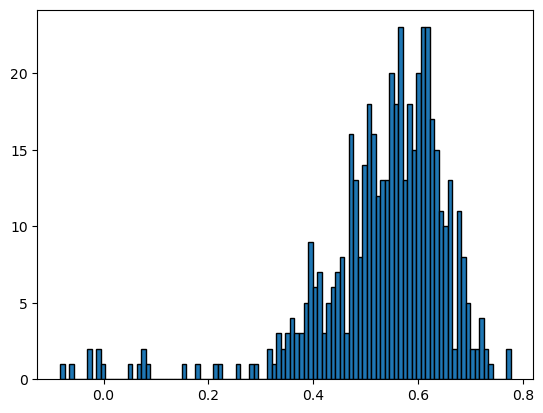

In [31]:
plt.hist(simulated_params, bins=100, edgecolor='black')
plt.show()